Also known as ***People Analytics***, it is a data-driven approach to managing people at work.

The usual problems it addresses are:

- Hiring
- Retention
- Performance
- Churn/Turnover

When an employee turnover, that person leaves the company. This might be a high cost for the company and may later affect the company's hiring or retention decisions.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Read "turnover.csv" and save it in a DataFrame called data
data = pd.read_csv('../data/23. Analíticos en HR/turnover.csv', index_col=0)

## Finding categorical variables
Categorical variables are variables that receive a limited number of values that describe a category. They can be of two types:

- `Ordinal` – variables with two or more categories that can be ranked or ordered (e.g. “low”, “medium”, “high”)
- `Nominal` – variables with two or more categories that do not have an intrinsic order (e.g. “men”, “women”)

You will get some information about the types of variables that are available in the dataset.

In [24]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [25]:
# Get some information on the types of variables in data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In your dataset:

- `salary` is an ordinal variable
- `department` is a nominal variable

In [26]:
# Print the unique values of the "department" column
data.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [27]:
# Print the unique values of the "salary" column
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

## Transforming categorical variables

### Encoding categories
You need to help your algorithm understand that you're dealing with categories. You will encode categories of the salary variable, which you know is ordinal based on the values you observed:

- you first have to tell Python that the salary column is actually categorical
- you then have to specify the correct order of categories
- finally, you should encode each category with a numeric value corresponding to its specific position in the order

In [28]:
# Change the type of the "salary" column to categorical
data.salary = data.salary.astype('category')

In [29]:
# Provide the correct order of categories
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])

In [30]:
# Encode categories
data.salary = data.salary.cat.codes

In [31]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


## Getting dummies
You will now transform the department variable, which you know is nominal based on the values you observed. To do that, you will use so-called dummy variables.

In [32]:
# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data.department)
departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


## Dummy trap
A dummy trap is a situation where different dummy variables convey the same information. In this case, if an employee is, say, from the accounting department (i.e. value in the `accounting` column is 1), then you're certain that s/he is not from any other department (values everywhere else are 0). Thus, you could actually learn about his/her department by looking at all the other departments.

For that reason, whenever `n` dummies are created (in your case, 10), only `n - 1` (in your case, 9) of them are enough, and the n-th column's information is already included.

Therefore, you will get rid of the old department column, drop one of the department dummies to avoid dummy trap, and then the two DataFrames.

In [33]:
# Drop the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis=1)

# Join the new dataframe "departments" to your employee dataset: done
data = data.join(departments)

In [34]:
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,0,0,0,0,0,0,1,0,0


In [35]:
# Drop the old column "department" as you don't need it anymore
data = data.drop("department", axis=1)

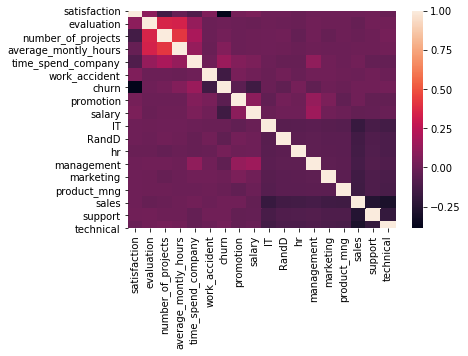

In [40]:
# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)

plt.show()

## Percentage of employees who churn
The column `churn` is providing information about whether an employee has left the company or not is the column `churn`:

- if the value of this column is 0, the employee is still with the company
- if the value of this column is 1, then the employee has left the company

Let’s calculate the turnover rate:

- you will first count the number of times the variable `churn` has the value 1 and the value 0, respectively
- you will then divide both counts by the total, and multiply the result by 100 to get the percentage of employees who left and stayed

In [42]:
# Print the number of employees who left/stayed
data.churn.value_counts(normalize=True) * 100

0    76.191746
1    23.808254
Name: churn, dtype: float64

## Separating Target and Features
In order to make a prediction (in this case, whether an employee would leave or not), one needs to separate the dataset into two components:

- the ***dependent variable*** or target which needs to be predicted
- the ***independent variables*** or features that will be used to make a prediction

Your task is to separate the target and features. The target you have here is the employee churn, and features include everything else.

In [43]:
# Choose the dependent variable column (churn) and set it as target
target = data.churn

In [44]:
# Drop column churn and set everything else as features
features = data.drop("churn", axis=1)

## Spliting employee data

**Overfitting** the dataset is a common problem in analytics. This happens when a model is working well on the dataset it was developed upon, but fails to generalize outside of it.

A **train/test split** is implemented to ensure model generalization: you develop the model using the training sample and try it out on the test sample later on.

In this exercise, you will split both target and features into train and test sets with **75%/25%** ratio, respectively.

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
target_train, target_test, features_train, features_test = train_test_split(target, features, test_size=0.25, random_state=42)

In [50]:
features_train.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
14480,0.38,0.86,6,139,6,0,0,1,0,0,0,0,0,0,0,0,1
1934,0.78,0.93,4,225,5,0,0,1,0,0,0,0,0,0,1,0,0
7900,0.56,0.71,5,243,3,0,0,1,0,0,0,0,0,0,0,0,1
2952,0.96,0.62,4,217,2,0,0,1,0,0,0,0,0,0,0,1,0
4367,0.83,0.53,3,211,4,1,0,0,0,0,0,0,0,0,1,0,0


## Predicting employee churn using decision trees

The decision tree algorithm aims to achieve partitions in the terminal nodes that are as pure as possible.


<img src= '../images/dt.jpg'>

### Fitting the tree to employee data
A ***train/test split*** provides the opportunity to develop the classifier on the training component and test it on the rest of the dataset. In this exercise, you will start developing an employee turnover prediction model using the decision tree classification algorithm. The algorithm provides a `.fit()` method, which can be used to fit the features to the model in the training set.

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

In [65]:
# Apply a decision tree model to fit features to the target
model = model.fit(features_train, target_train)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

### Checking the accuracy of prediction
It’s now time to check how well your trained model can make predictions! Let’s use your testing set to check the accuracy of your Decision Tree model, with the `.score()` method.

In [66]:
# Check the accuracy score of the prediction for the training set
model.score(features_train, target_train) * 100

100.0

In [67]:
# Check the accuracy score of the prediction for the test set
model.score(features_test, target_test) * 100

97.22666666666666

## Exporting the tree
In Decision Tree classification tasks, overfitting is usually the result of deeply grown trees. As the comparison of accuracy scores on the train and test sets shows, you have overfitting in your results. This can also be learned from the tree visualization.

In this exercise, you will export the decision tree into a text document, which can then be used for visualization.

In [60]:
from sklearn.tree import export_graphviz, plot_Tree

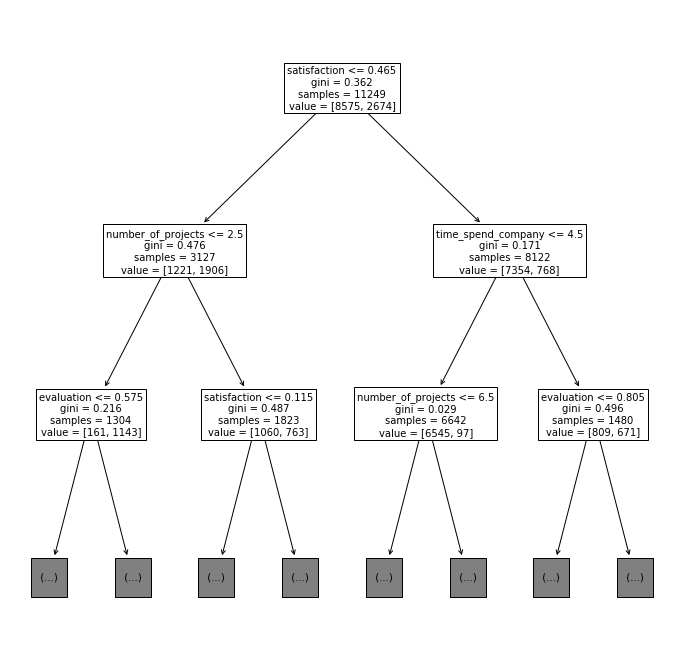

In [81]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(model, max_depth=2, fontsize=10, feature_names=features_train.columns)
plt.savefig('../outputs/tree_high_dpi', dpi=100);
plt.show()

## Pruning the tree
Overfitting is a classic problem in analytics, especially for the decision tree algorithm. Once the tree is fully grown, it may provide highly accurate predictions for the training sample, yet fail to be that accurate on the test set. For that reason, the growth of the decision tree is usually controlled by:

“Pruning” the tree and setting a limit on the maximum depth it can have.
Limiting the minimum number of observations in one leaf of the tree.

Another method to prevent overfitting is to specify the minimum number of observations necessary to grow a leaf (or node), in the Decision Tree.

In [84]:
# Initialize the DecisionTreeClassifier while limiting the depth of the tree to 5
model_tuned = DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, random_state=42)

# Fit and print the model
model_tuned.fit(features_train,target_train)

# Print the accuracy of the prediction for the training set
print('Training acc:', model_tuned.score(features_train,target_train)*100)

# Print the accuracy of the prediction for the test set
print('Test acc:', model_tuned.score(features_test,target_test)*100)

Training acc: 96.57747355320473
Test acc: 96.13333333333334


## Evaluating our model

- we define **True Positives** as the number of employees who actually left, and were classified correctly as leaving
- we define **False Positives** as the number of employees who actually stayed, but were wrongly classified as leaving

In [87]:
from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(model_tuned.predict(features_test), target_test)

array([[2792,   84],
       [  61,  813]], dtype=int64)

While accuracy is a great metric, we have others:
    
- **Recall** score puts too much weight on the number of False Negatives. 
- **Precision** is concentrated on the number of False Positives.

## Class imbalance

What is the prior Probability of an employee to churn the compnay? That means `y = 1`.



In [93]:
data.churn.value_counts(normalize=True) * 100

0    76.191746
1    23.808254
Name: churn, dtype: float64

To solve the imbalance, equal weights are usually given to each class. Using the class_weight argument in sklearn's DecisionTreeClassifier, one can make the classes become "balanced".

In [98]:
# Initialize the DecisionTreeClassifier 
model_depth_b = DecisionTreeClassifier(max_depth=7, class_weight="balanced", random_state=42)

# Fit the model
model_depth_b.fit(features_train, target_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [101]:
# Print the accuracy of the prediction (in percentage points) for the test set
print('Training acc:', model_depth_b.score(features_train, target_train) * 100)

# Print the accuracy of the prediction (in percentage points) for the test set
print('Test acc:', model_depth_b.score(features_test, target_test) * 100)

Training acc: 97.95537381100542
Test acc: 97.44


## Hyperparameter tuning

### Cross-validation using sklearn
Overfitting the dataset is a common problem in data science. This happens when a model has learned the data too closely: it has great performances on the dataset it was trained on, but fails to generalize outside of it.

While the train/test split technique you learned ensures that the model does not overfit the training set, hyperparameter tuning may result in overfitting the test component, since it consists in tuning the model to get the best prediction results on the test set. Therefore, it is recommended to validate the model on different testing sets. 

K-fold cross-validation allows us to achieve this:

- it splits the dataset into a training set and a testing set
- it fits the model, makes predictions and calculates a score (you can specify - if you want the accuracy, precision, recall…)
- it repeats the process k times in total
- it outputs the average of the 10 scores

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
# Use that function to print the cross validation score for 10 folds
cross_val_score(model, features, target, cv=10)

array([0.9853431 , 0.98533333, 0.974     , 0.96533333, 0.96      ,
       0.97933333, 0.99      , 0.99333333, 1.        , 1.        ])

In [104]:
cross_val_score(model, features, target, cv=10).mean()

0.9832676437930269

## Setting up GridSearch parameters
A hyperparameter is a parameter inside a function. For example, max_depth or min_samples_leaf are hyperparameters of the DecisionTreeClassifier() function. Hyperparameter tuning is the process of testing different values of hyperparameters to find the optimal ones: the one that gives the best predictions according to your objectives. In sklearn, you can use GridSearch to test different combinations of hyperparameters. Even better, you can use `GridSearchCV()` test different combinations and run cross-validation on them in one function!

In this exercise, you are going to prepare the different values you want to test for max_depth and min_samples_leaf. You will then put these in a dictionary, because that’s what is required for GridSearchCV():

- the dictionary keys will be the hyperparameters names
- the dictionary values will be the attributes (the hyperparameter values) you want to test

Instead of writing all the values manually, you will use the `range()` function, which allows us to generate values incrementally. For example, `range(1, 10, 2`) will generate a list containing values ranging from 1 included to 10 not included, by increments of 2. So the final result will be `[1, 3, 5, 7, 9]`.

In [138]:
# Generate values for maximum depth
depth = [i for i in range(5, 10, 1)]

# Generate values for minimum sample size
samples = [i for i in range(50, 300, 50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [139]:
parameters

{'max_depth': [5, 6, 7, 8, 9], 'min_samples_leaf': [50, 100, 150, 200, 250]}

### Implementing GridSearch
You can now use the sklearn `GridSearchCV()` function to find the best combination of all of the `max_depth` and `min_samples_leaf` values you generated in the previous exercise.

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
model

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [142]:
# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters, cv=10, verbose=True, n_jobs=-1)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   11.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_leaf': [50, 100, 150, 200, 250]},
      

In [143]:
# print the best parameters found
print(param_search.best_params_)

{'max_depth': 7, 'min_samples_leaf': 50}


In [144]:
model_best = param_search.best_estimator_

In [145]:
# Print the accuracy of the prediction (in percentage points) for the test set
print('Training acc:', param_search.best_estimator_ .score(features_train, target_train) * 100)

# Print the accuracy of the prediction (in percentage points) for the test set
print('Test acc:', param_search.best_estimator_ .score(features_test, target_test) * 100)

Training acc: 97.021957507334
Test acc: 96.64


## Sorting important features
Among other things, Decision Trees are very popular because of their interpretability. Many models can provide accurate predictions, but Decision Trees can also quantify the effect of the different features on the target. Here, it can tell you which features have the strongest and weakest impacts on the decision to leave the company. In sklearn, you can get this information by using the `feature_importances_` attribute.

In [146]:
# Calculate feature importances
feature_importances = model_best.feature_importances_

# Create a list of features: done
feature_list = list(features.columns)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort the DataFrame to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.475605
time_spend_company,0.368257
evaluation,0.098420
average_montly_hours,0.038886
number_of_projects,0.014152
technical,0.003096
hr,0.000961
salary,0.000622
promotion,0.000000
work_accident,0.000000


In [147]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

In [148]:
features_train_selected

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company
14480,0.38,0.86,6,139,6
1934,0.78,0.93,4,225,5
7900,0.56,0.71,5,243,3
2952,0.96,0.62,4,217,2
4367,0.83,0.53,3,211,4
...,...,...,...,...,...
5191,0.52,0.96,4,246,3
13418,0.49,0.65,4,233,7
5390,0.66,0.73,5,249,2
860,0.79,1.00,4,218,5


You realized that you could get accurate predictions using just a small number of selected, impactful features and you updated your training and testing set accordingly, creating the variables `features_train_selected` and `features_test_selected`.

With all this information at your disposal, you're now going to develop the best model for predicting employee turnover and evaluate it using the appropriate metrics.

In [151]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, class_weight="balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best.score(features_test_selected, target_test) * 100)

96.64
